# FIT 5196-S2-2018

# Kanav Jamwal

## Assesment:2 (Data Cleansing)
##  ID :29554209
### Submission Date:3-Oct-2018


### Platform: Python 3.6
### Libraries used
 * Matplot Library
 * Pandas
 * Maths
 * Numpy
 * KNeighborsClassifier
 * Sklearn
 * Date Time 
 * Regular expression

In [1]:
#Basic scientific python libs
import pandas as pd
#import numpy as np
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import LinearRegression

### Reading the file 

Reading the csv file.

In [2]:
Drone=pd.read_csv("29554209.csv")

### Basic analysis of the data frame

To get to now that how many rows and columns are there.

In [3]:
#The shape of the data frame
print(Drone.shape)


(38142, 16)


### Analysis of the date frame 

About the number of columns and count of every column,mean and standard deviation which tell you about the variation in the column. 

In [4]:
#To get an idea of the values in the column
#range
Drone.describe()

Drone Type     Post Type  Package Weight  Origin Region  \
count  38132.000000  38122.000000    38142.000000   38132.000000   
mean       1.701878      0.294764       25.185585      23.932235   
std        0.780572      0.455943       11.799020      13.584089   
min        1.000000      0.000000        5.000000       1.000000   
25%        1.000000      0.000000       15.084750      12.000000   
50%        2.000000      0.000000       25.114500      24.000000   
75%        2.000000      1.000000       35.232750      36.000000   
max        3.000000      1.000000       54.986000      47.000000   

       Destination Region  Origin Latitude  Origin Longitude  \
count        38132.000000     38142.000000      38142.000000   
mean            24.054233       -37.704746        145.461518   
std             13.537258         1.890679          6.874818   
min              1.000000       -39.006985       -148.258629   
25%             12.000000       -38.387456        144.133607   
50%             24.000000       -37.784718        145.759298   
75%             36.000000       -37.094944        146.990533   
max             47.000000        38.937888        148.450980   

       Destination Latitude  Destination Longitude  Journey Distance  \
count          38142.000000           38142.000000      38142.000000   
mean             -37.704142             145.447537        213.471257   
std                1.893655               6.873764        110.002434   
min              -39.006985            -147.993468          0.172000   
25%              -38.383681             144.120297        127.989250   
50%              -37.791055             145.743232        201.987500   
75%              -37.092728             146.974902        287.751750   
max               38.967059             148.450980        539.821000   

        Travel Time  Delivery Fare  
count  38102.000000   38112.000000  
mean     206.499906     138.919243  
std      103.944966      54.688659  
min        7.040000      64.740000  
25%      126.155000     110.060000  
50%      195.420000     133.050000  
75%      276.077500     158.520000  
max      531.990000    1088.660000

In [5]:
#Count the no of null vales in a column. 
Drone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38142 entries, 0 to 38141
Data columns (total 16 columns):
Id                       38118 non-null object
Drone Type               38132 non-null float64
Post Type                38122 non-null float64
Package Weight           38142 non-null float64
Origin Region            38132 non-null float64
Destination Region       38132 non-null float64
Origin Latitude          38142 non-null float64
Origin Longitude         38142 non-null float64
Destination Latitude     38142 non-null float64
Destination Longitude    38142 non-null float64
Journey Distance         38142 non-null float64
Departure Date           38142 non-null object
Departure Time           38142 non-null object
Travel Time              38102 non-null float64
Delivery Time            38142 non-null object
Delivery Fare            38112 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.7+ MB


### Removing the duplicates from the data frames .

As we got duplicate value in our data frame so we are just comparing the value of each column if its same than we are deleting the duplicate value.

In [6]:
Drone= Drone.drop_duplicates(subset = ['Drone Type', 'Post Type', 'Package Weight', 'Origin Region', 'Destination Region', 'Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Latitude', 'Journey Distance', 'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time', 'Delivery Fare'])
Drone =Drone.drop_duplicates(keep=False, inplace=False)

### No of values now in the data frame.

In [7]:
Drone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38082 entries, 0 to 38081
Data columns (total 16 columns):
Id                       38082 non-null object
Drone Type               38072 non-null float64
Post Type                38062 non-null float64
Package Weight           38082 non-null float64
Origin Region            38072 non-null float64
Destination Region       38072 non-null float64
Origin Latitude          38082 non-null float64
Origin Longitude         38082 non-null float64
Destination Latitude     38082 non-null float64
Destination Longitude    38082 non-null float64
Journey Distance         38082 non-null float64
Departure Date           38082 non-null object
Departure Time           38082 non-null object
Travel Time              38042 non-null float64
Delivery Time            38082 non-null object
Delivery Fare            38052 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.9+ MB


## For ID 
As I have seen the pattern in the excel as well that IDS start only with 1 or 5 and the pattern which I make out from it was that the ID starting with 1 has a normal delivery and the ID starting with 5 has a express delivery.

In [8]:
#Changing the value of Id when he finds 1 then it will stay 0 otherwise it will change to 1.
Drone["ID"]=Drone["Id"].str[0:3]
Drone["Post Type"]=np.where(Drone["ID"]=='ID1',0,1)

### Splitting the date into each of the column .

Splitting the date into months,years and days and than start working on the anamolies in it.

In [9]:
#Splitting the Departure date into Year,month ,day.
new_date = Drone['Departure Date'].apply(lambda s: pd.Series({'Year': s.split('-')[0].strip(),
                            'Month':s.split('-')[1].strip(), 'Day':s.split('-')[2].strip()}))

### Checking for error in a month which got value more than 12.

As we got lot of errors in a date we are checking about the basic mismatch that a person has put the date in place of the month.

In [10]:
#Checking for errors in month that it might get months more than 12.
count=0
for i in range(0,len(Drone["Id"])):
    if((int(new_date['Month'][i])>12)):
        count+=1
count        
             


111

### Replacing the month value with a date which has a value more than 12.

Swaping the days and months as it can't happen that month got a value of more than 12 so we are checking on it.

In [11]:
#Replacing the months which has a value greater than 12 with days.
for i in range(0,len(Drone["Id"])):
    #checking condition
      if((int(new_date['Month'][i])>12)):
        x=new_date['Month'][i]
        new_date['Month'][i]=new_date['Day'][i]
        new_date['Day'][i]=x
        

### Checking for errors (EDA) in feb month whether it has got more than 28 days

By checking for this kind of error we got about 34 frequency in which the days of Feb month is more than 28.

In [12]:
#Checking for errors for the month of feb that whether it has more than 28 days or not
count=0
for i in range(0,len(Drone["Id"])):
    #Condition that whether feb has more than 28 days
    if new_date.iloc[i,1] in ['02'] and new_date.iloc[i,2] in ['29','30','31'] :
        count+=1
count        

34

### Replacing the month value with 3 March if Feb has got more than 28 days

In this we are replacing the month or moving the value of month to the next and shifting the date to the 1 st of that month.

In [13]:
#Rectifying the errors for the feb month
for i in range(0,len(Drone["Id"])):
    #Condition that a month got more than 28 days
     if new_date['Month'][i] in ['02'] and int(new_date['Day'][i])>28:
        x=new_date['Month'][i]
        x=int(x)
        x+=1
        new_date['Month'][i]='0'+str(x)
        new_date['Day'][i]='01'


### Checking in months which has 30 days that for eg April should not have more than 30 days.

4 of the months in a year doesn't have more than 30 days so we are checking that whether any of this month got more than 30 days by using it in the condition.

In [14]:
#Whether the april ,june ,september and november got 31 days or not. 
count=0
for i in range (0,len(Drone["Id"])):
    #Condition for months which got only 30 days .
     if new_date['Month'][i] in ['04','06','09','11'] and new_date.iloc[i,2] in['31']:
        count+=1
count        

66

### Changing the 31 st date of the month which got  only 30 days and changing it to the 1st of next month.

Now changing the anomaly in the month and changing the value of the month and date to the next month and 1st day of the month. 

In [15]:
#Changing the month to the next month and giving it date of 1st of next month
for i in range (0,len(Drone["Id"])):
    #Condition for checking that months which got 31 days
     if new_date['Month'][i] in ['04','06','09','11'] and new_date.iloc[i,2]=='31':
        x=new_date['Month'][i]
        x=int(x)
        #Changing it to the next month
        x+=1
        new_date['Month'][i]='0'+str(x)
        new_date['Day'][i]='01'
            
            


### Making it a one column combining all together.

We need to update the value of the date into dataframe so clubbing all the values making it a single column.

In [16]:
#Making it a one column combining all together
new_date['m']=new_date['Year']+'-'+new_date['Month']+'-'+new_date['Day']

## Updating it in the main data frame.

Putting the correct date format into the original data frame. 

In [17]:
#Changing in the main frame
Drone['Departure Date'] = new_date['m']
#Drone['Departure Date']=pd.to_datetime(Drone['Departure Date'])


### Analyses

By analysing we found out that we got lot of negative value in our Origin longitude now we will fix them.

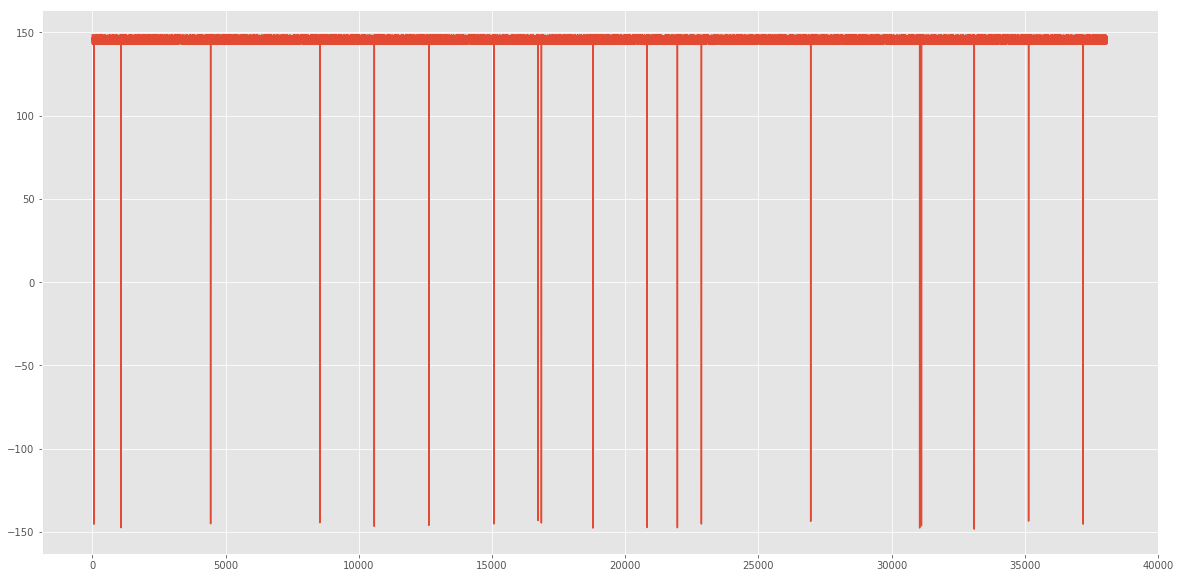

In [18]:
plt.figure(figsize=(20,10))
plt.grid(True)
Drone["Origin Longitude"].plot()

### Checking for errors in origin longitude

As the origin longitude should be positive because by plotting the graph in the tableau it shows that all of the delivery were in Victoria region.


In [19]:
#Check that whether the origin longitude has got some negative value.
count=0
for i in range(0,len(Drone["Id"])):
    if Drone["Origin Longitude"][i]<0:
        count+=1 
count        

20

### Rectifying the error by making the - origin longitude to +. 

By checking whether it has got any negative value so if it got any of the negative value than multiply it neagtive 1 so that to make it positive.

In [20]:
#Making all the - origin longitude into positive.
count=0
for i in range(0,len(Drone["Id"])):
    #Condition
    if Drone["Origin Longitude"][i]<0:
        count+=1
        Drone["Origin Longitude"][i]=(Drone["Origin Longitude"][i]*-1)   
#Drone["Origin Longitude"] 
count

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


20

### Analyses

By analysing we found out that we got lot of positive value in our Origin latitude now we will fix them.

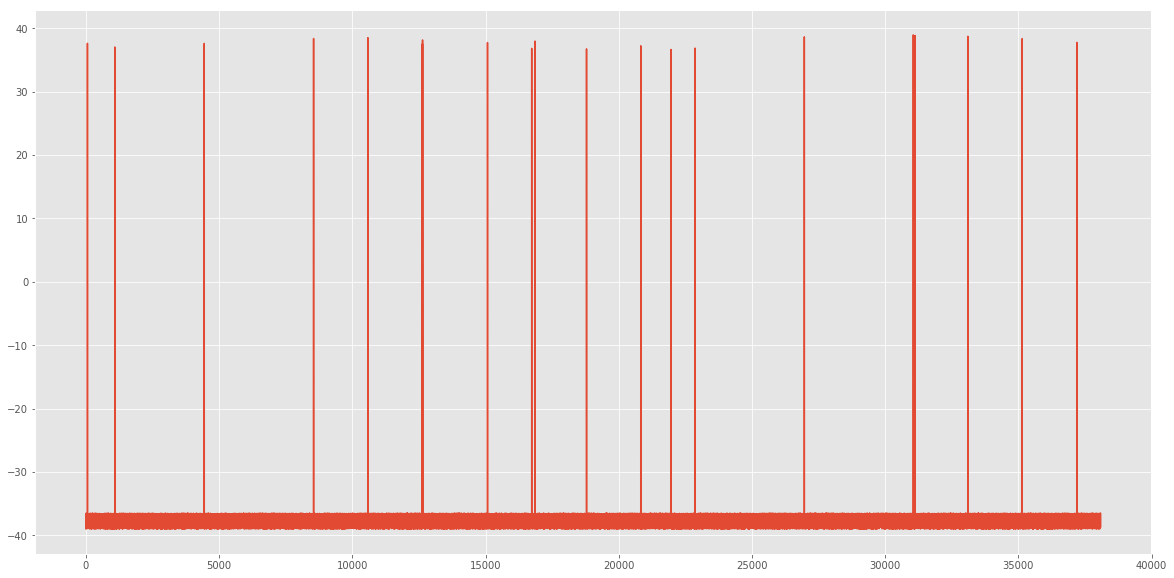

In [21]:
plt.figure(figsize=(20,10))
plt.grid(True)
Drone["Origin Latitude"].plot()

### Checking for errors in origin latitude that it got any positive value.

The origin latitude it does not show to have any of the positive value in it so we are checking for the positive value and if we find any positive than we will multiply by -1.

In [22]:
#Check that whether the origin latitude has got some positive value.
count=0
for i in range(0,len(Drone["Id"])):
    if Drone["Origin Latitude"][i]>0:
        count+=1 
count   

20

### Rectifying the error by making the + origin latitude to -. 

By using the condition of whether the latitiude has got any positive value than we will make it negative. 

In [23]:
#Converting the positive origin latitude to negative latitude. 
count=0
for i in range(0,len(Drone["Id"])):
    #Condition
    if Drone["Origin Latitude"][i]>0:
        count+=1
        Drone["Origin Latitude"][i]=(Drone["Origin Latitude"][i]*-1)

count        #Drone["Origin Latitude"]

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


20

### Analyses 

By analysing we found out that we got lot of negative value in our Destination longitude now we will fix them.

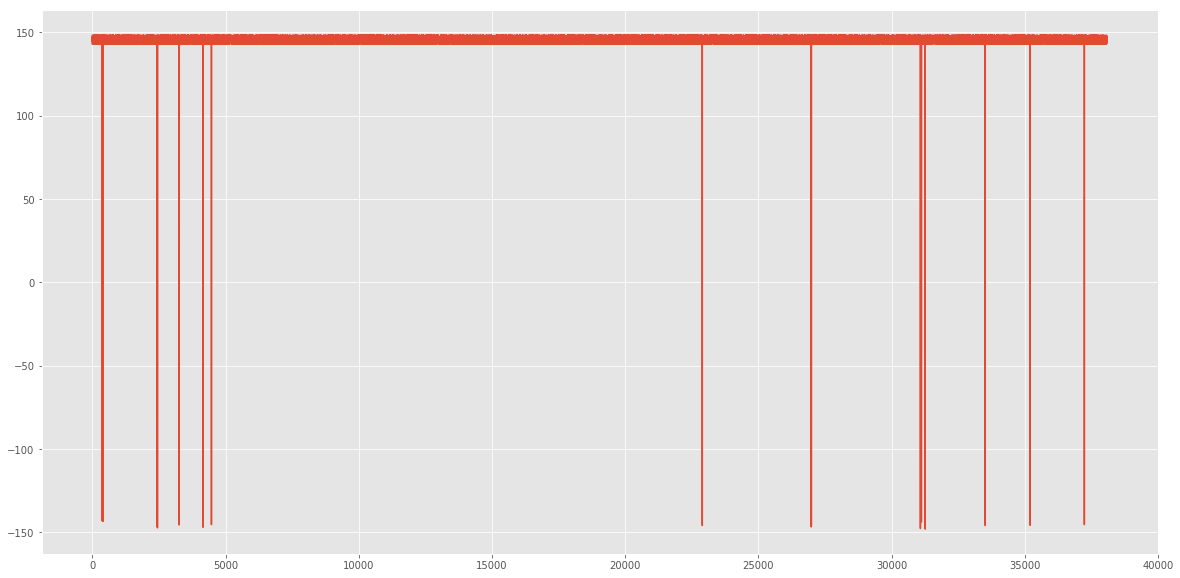

In [24]:
plt.figure(figsize=(20,10))
plt.grid(True)
Drone["Destination Longitude"].plot()

### Checking for errors in Destination longitude .

Same concept followed in destination longitude as well that whether it has got any negative value.

In [25]:
#Check that whether the destination longitude has got some negative value.
count=0
for i in range(0,len(Drone["Id"])):
    if Drone["Destination Longitude"][i]<0:
        count+=1 
count   

20

### Rectifying the error by making the - destination Longitude to +. 

By using the same condition that if any value is negative than make it multiply by -1 so that it makes into posititve.

In [26]:
#Converting the - destination longitude into positive.
count=0
for i in range(0,len(Drone["Id"])):
    #Condition
    if Drone["Destination Longitude"][i]<0:
        Drone["Destination Longitude"][i]=(Drone["Destination Longitude"][i]*-1)
        count+=1
count
#Drone["Destination Longitude"]        
   

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


20

### Analyses
By analysing we found out that we got lot of positive value in our Destination Latitude now we will fix them.

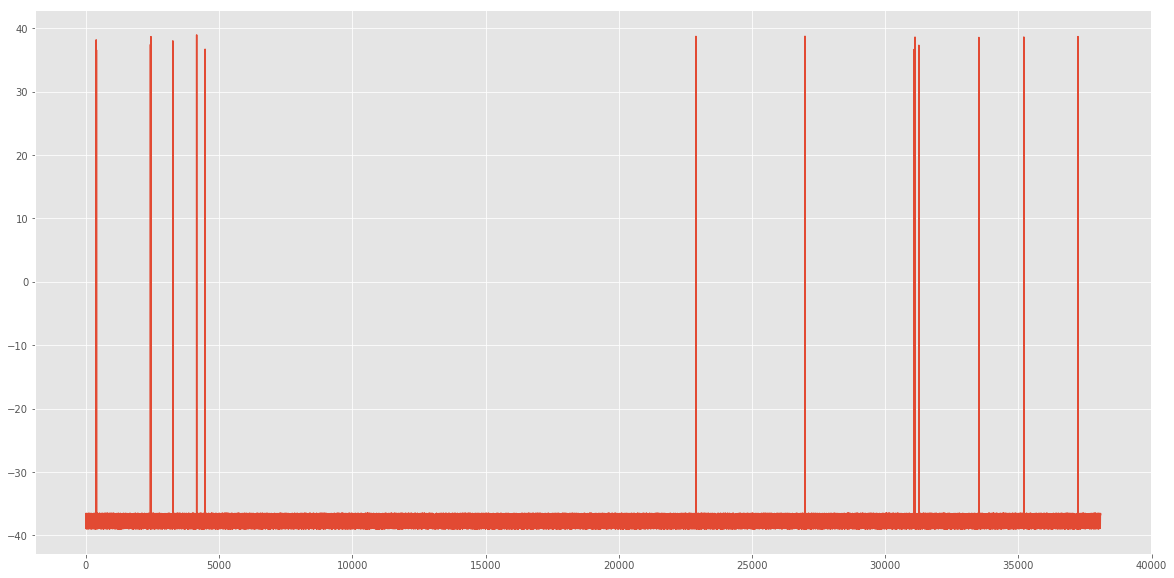

In [27]:
plt.figure(figsize=(20,10))
plt.grid(True)
Drone["Destination Latitude"].plot()

### Check for the error in destination latitude.

Check that whether the destination latitude has got some positive value.

In [28]:
#Check that whether the destination latitude has got some positive value.
count=0
for i in range(0,len(Drone["Id"])):
    if Drone["Destination Latitude"][i]>0:
        count+=1 
count 

20

### Rectifying the error by making the + destination Latitude to -. 

By using the same condition for a positive number and than multiply the positive number by -1 to get the desired output.

In [29]:
#Converting the destination latitude + value into -
count=0
for i in range(0,len(Drone["Id"])):
    if Drone["Destination Latitude"][i]>0:
        count+=1
        Drone["Destination Latitude"][i]=(Drone["Destination Latitude"][i]*-1)
count
#Drone["Destination Latitude"]

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


20

### Now finding the distance two points using two lat long points.

There would be some errrors in the distance travelled column so we are calculating the distance travelled by using the origin,destination longitude and latitude and then we are comparing that with the main list what ever doesn't matches with that we are replacing it with calculated distance.  

In [30]:
#Taking refrence from 
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

from math import sin, cos, sqrt, atan2, radians
Final=[]
# Approximate radius of earth as given in assignment as well.
R = 6378
for i in range(0,len(Drone["Id"])):
    #Column access
    org_lat =  radians(Drone.iloc[i,6])
    org_long = radians(Drone.iloc[i,7])
    des_lat = radians(Drone.iloc[i,8])
    des_long = radians(Drone.iloc[i,9])

    dis_long = des_long - org_long
    dis_lat = des_lat - org_lat
  # using the formula to find the distance.
    a = sin(dis_lat / 2)**2 + cos(org_lat) * cos(des_lat) * sin(dis_long / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = round((R * c),3)
    Final.append(distance)
len(Final)

38082

### Comparing

If the calculated distance doesn't matches with the Journey distance we will swap it with the calculated distance.

In [31]:
#Comparing it with the original Journey Distance so that we can get a how many of them are incorrect.
count=0
for i in range(0,len(Drone["Id"])):
    if round(Drone["Journey Distance"][i],3)!= round(Final[i],3):
        Drone["Journey Distance"][i]=Final[i]
        count+=1
       
count        

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


14

## Analysing the Scatter Plot 

As we can see that there are lot of mistakes in the destination region that many of the colors if you zoom in you will found that they are mismatching and the points are lying on a different region. In the next section I have rectified the negatives and positives issues of the long and lat in the end I have rectified the region issues as well.

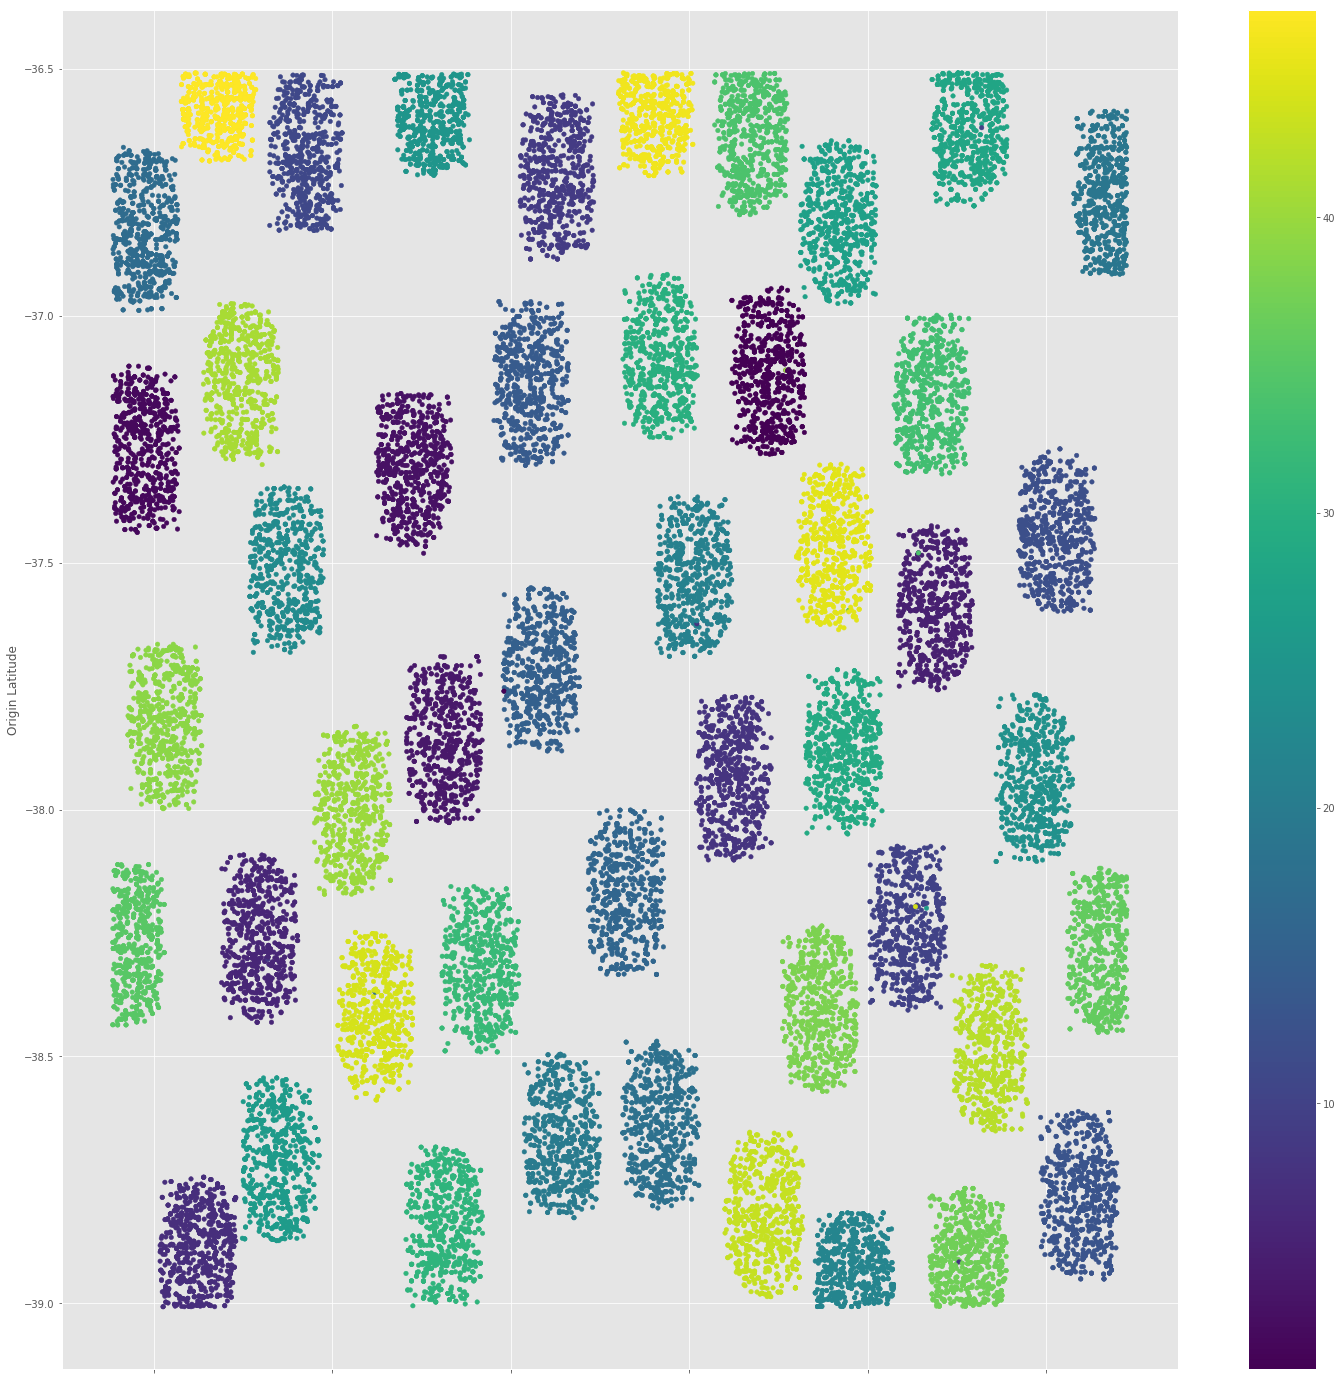

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
Drone.plot.scatter(x='Origin Longitude',y='Origin Latitude' ,figsize=(25,25),c = Drone['Origin Region'].values,colormap='viridis')


###  KNN clustering 

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression. Here we are using for classification.

In this model we have taken the origin latitude ,longitude and region with out null values than we apply the KNeighbour classifier and then we predict the origin region. 

In [33]:
#Refrence from https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn 
from sklearn.neighbors import KNeighborsClassifier
#To take origin region without null values
lis=Drone[(Drone["Origin Region"].isna() == False)]
lat_lon=lis[["Origin Latitude","Origin Longitude"]]
reg=lis["Origin Region"]
reg.values.reshape(-1,1)
cl = KNeighborsClassifier()
cl.fit(lat_lon,reg)
#Drone Prediction
Drone['Predicted'] = cl.predict(Drone[["Origin Latitude","Origin Longitude"]])
count=0
#Comparision with the original dataset after the prediction.
for i in Drone.index:
    if Drone["Predicted"][i] != Drone['Origin Region'][i]:
        Drone['Origin Region'][i]=Drone["Predicted"][i]
        count+=1              
count 

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


31

In [34]:
#Appending the value of origin region which has null value.

for i in Drone.index:
    if pd.isna(Drone['Origin Region'][i]):
        Drone['Origin Region'][i]=Drone["Predicted"][i]
             

**After the first analysis you will find this scatter plot to be much better though it's not perfect but still now it has been much better arranged in the region.**

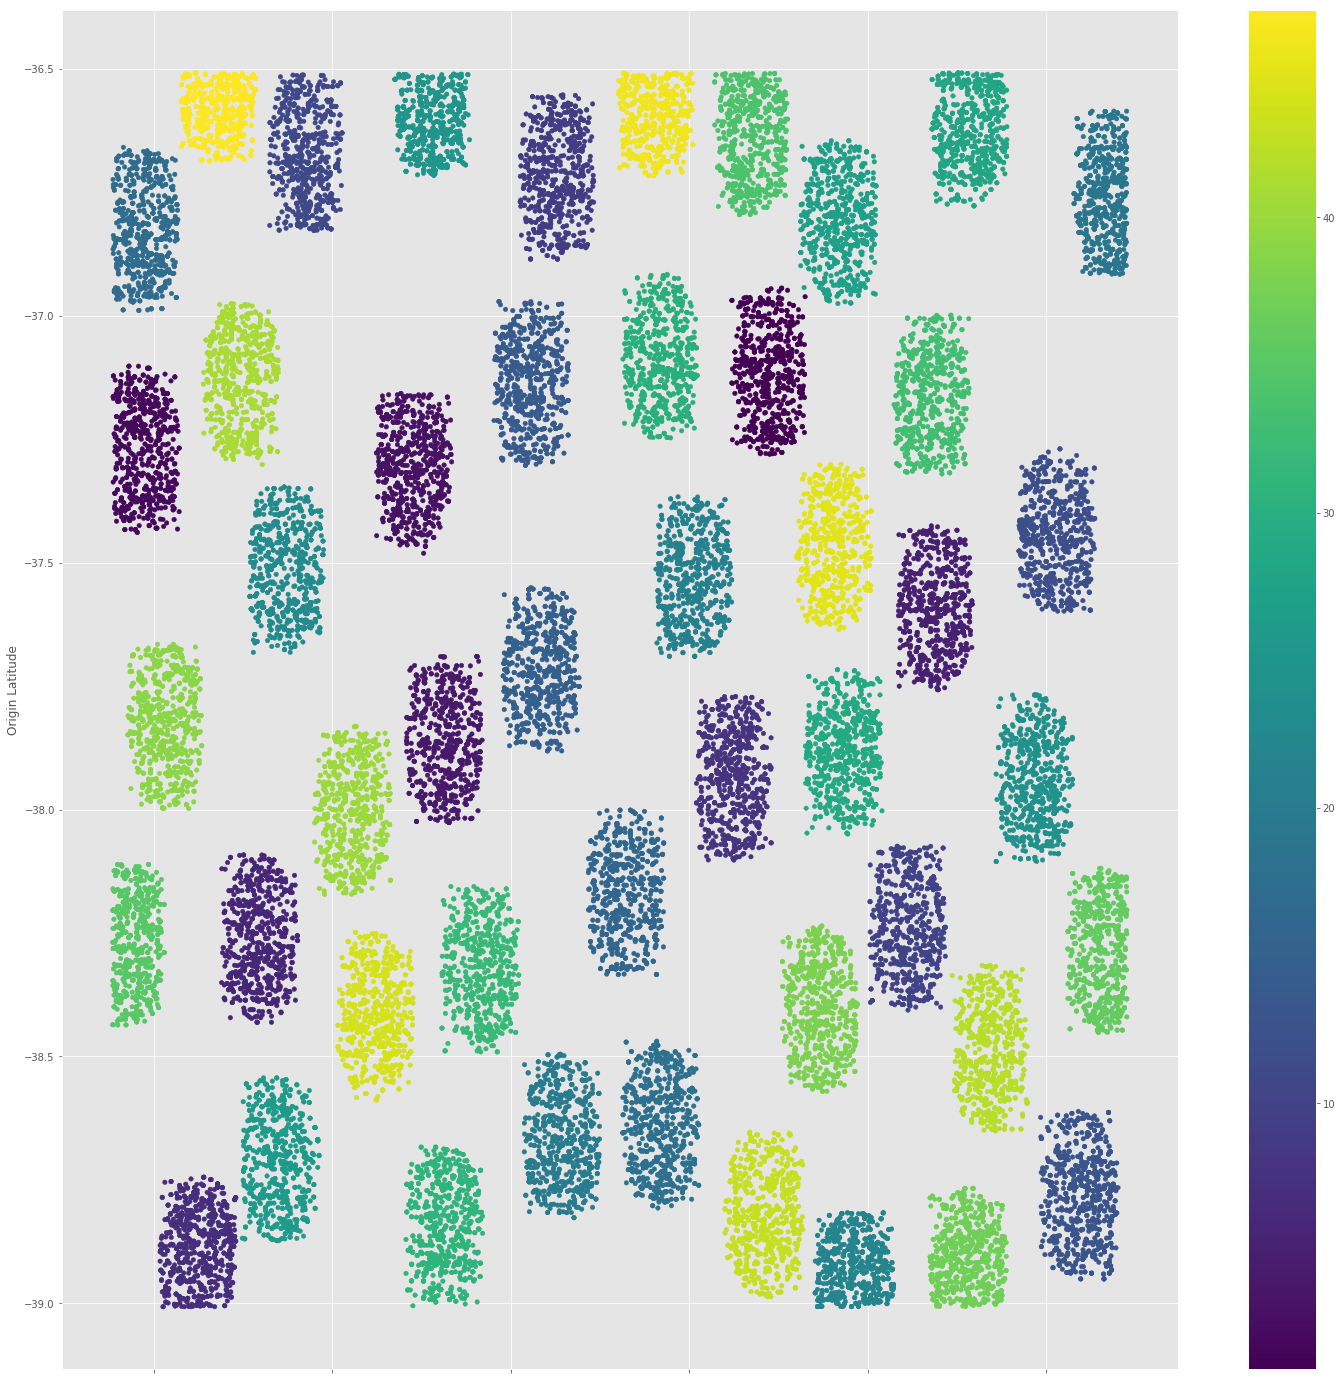

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
Drone.plot.scatter(x='Origin Longitude',y='Origin Latitude' ,figsize=(25,25),c = Drone['Origin Region'].values,colormap='viridis')


## Analysing the Scatter Plot 

As we can see that there are lot of mistakes in the origin region that many of the colors if you zoom in you will found that they are mismatching and the points are lying on a different region.

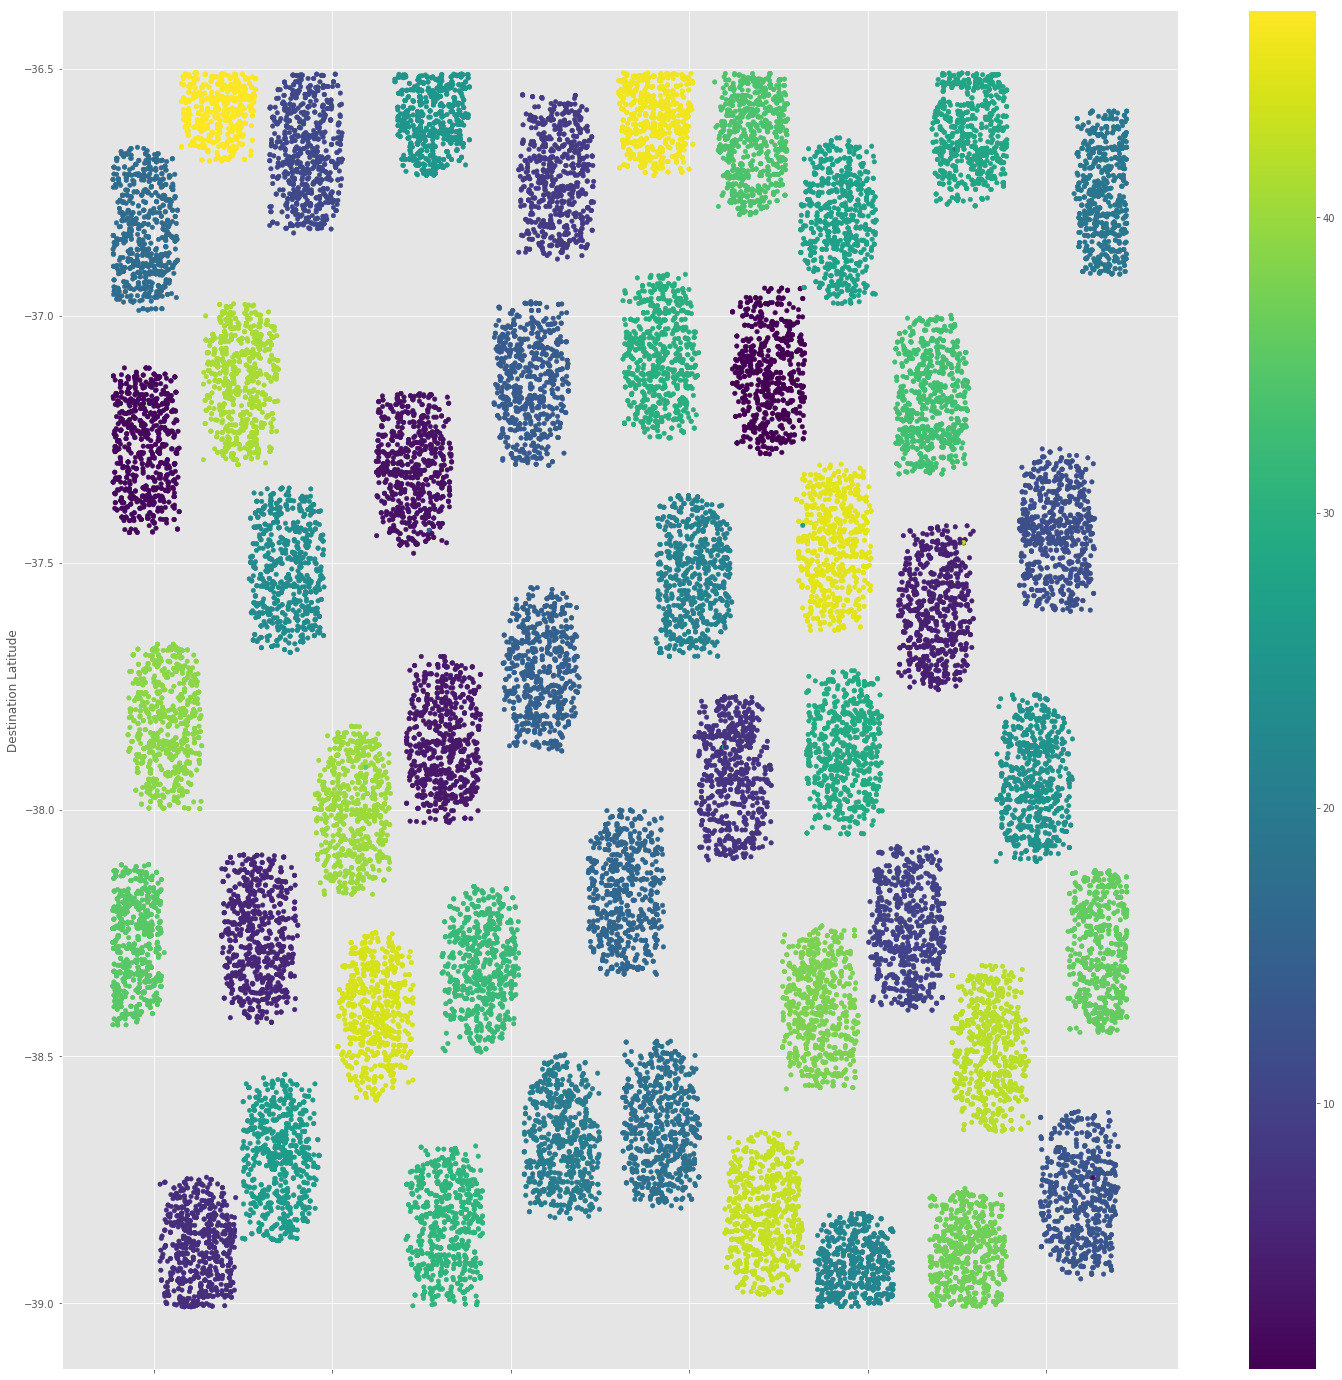

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
Drone.plot.scatter(x='Destination Longitude',y='Destination Latitude' ,figsize=(25,25),c = Drone['Destination Region'].values,colormap='viridis')


### Using KNN to predict the nearest neighbour value.

In [37]:
#Refrence from https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn 
from sklearn.neighbors import KNeighborsClassifier
#To take destination region without null values
lis=Drone[(Drone["Destination Region"].isna() == False)]
lat_lon=lis[["Destination Latitude","Destination Longitude"]]
reg=lis["Destination Region"]
reg.values.reshape(-1,1)
cl = KNeighborsClassifier()
cl.fit(lat_lon,reg)
#Drone Prediction
Drone['Predicted'] = cl.predict(Drone[["Destination Latitude","Destination Longitude"]])
count=0
#Comparision with the original dataset after the prediction
for i in range(0,len(Drone["Id"])):
    if Drone["Predicted"][i] != Drone['Destination Region'][i] :
        Drone['Destination Region'][i]=Drone["Predicted"][i]
        count+=1  

count            

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


34

### For appending the predicted value for the Destination region where the value is null.

In [38]:
#For null values
for i in range(len(Drone["Id"])):
    if pd.isna(Drone['Destination Region'][i]):
        Drone['Destination Region'][i]=Drone["Predicted"][i]
    
        

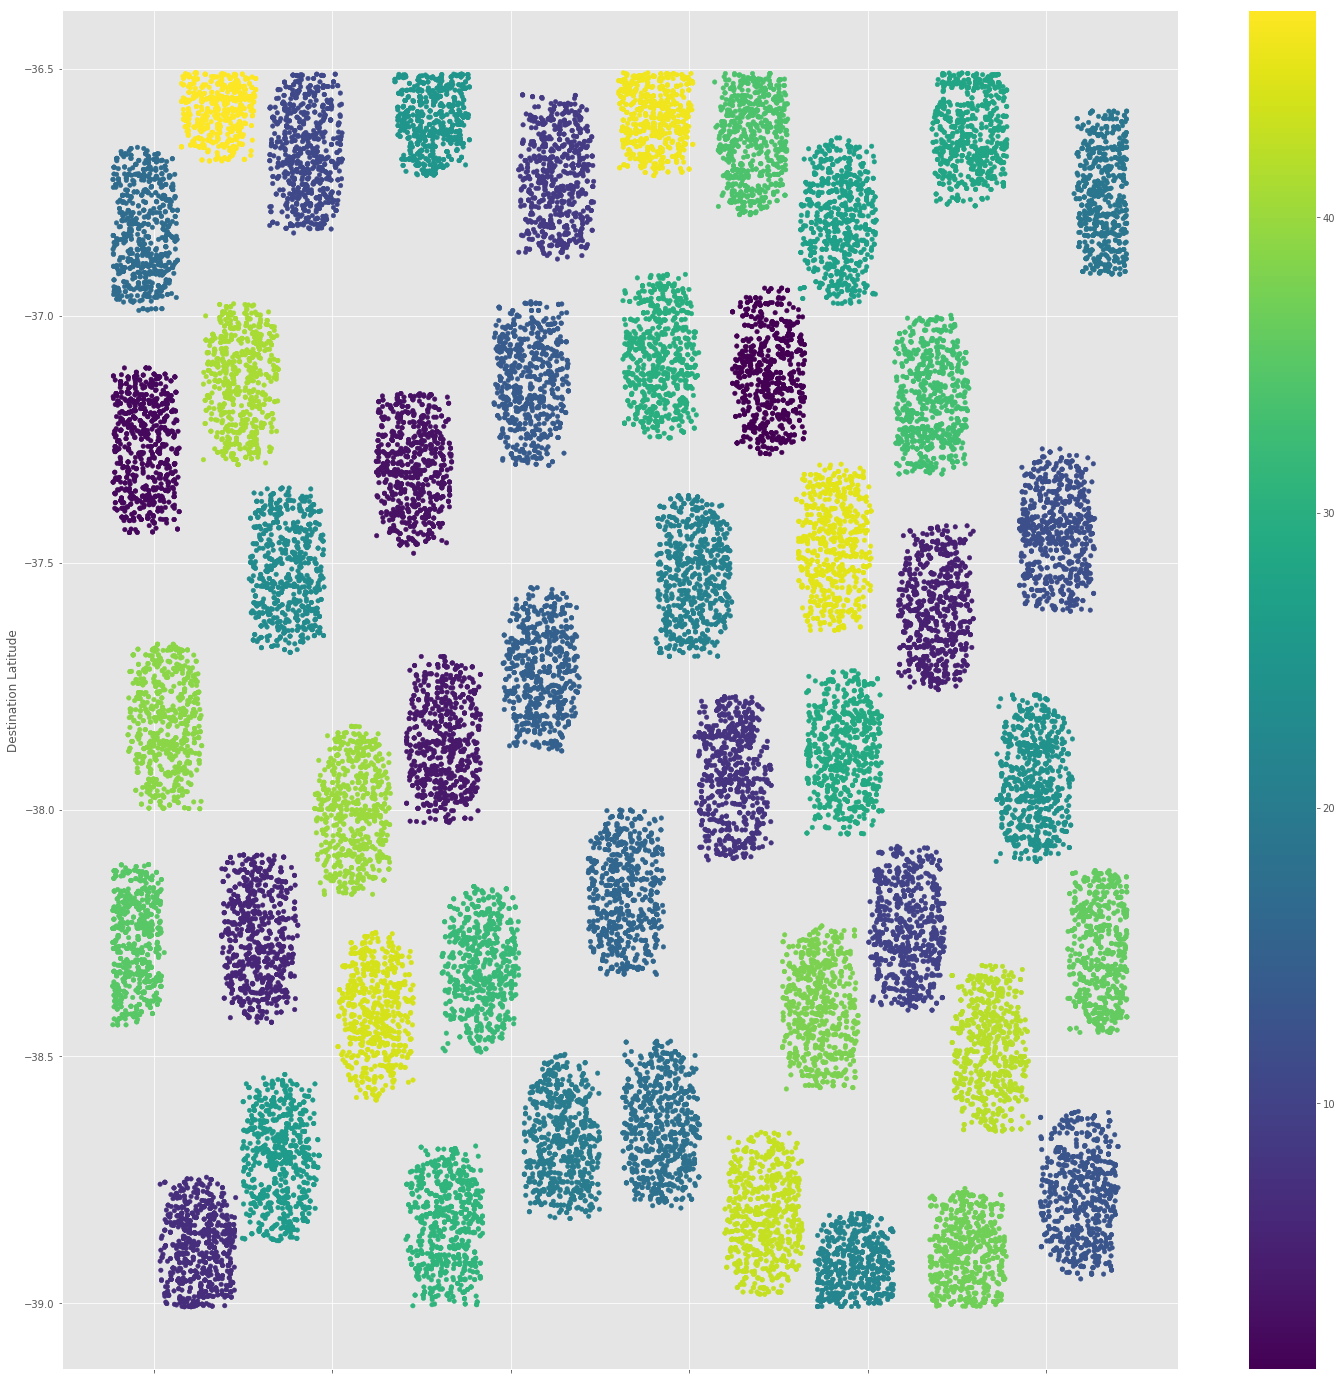

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
Drone.plot.scatter(x='Destination Longitude',y='Destination Latitude' ,figsize=(25,25),c = Drone['Destination Region'].values,colormap='viridis')



## Travel time analysis



### Checking the travel time and calculated travel time.

In this function we are calculating the time by subtracting the Departure time with the delivery time we are using strip function to get the values in a format and then subtracting them.

We are converting it into minutes now the case is when the date has been changed then the value is becoming negative so we are 24 *60 into it so that we get the correct value.

In the we are comparing the value with the original time if it is more than 0.8 then we are changing the distance. 

In [40]:
##libraries for converting into data into time format so we can manupulate it
from datetime import datetime, date   
from datetime import timedelta 
#saving the required values in a sample df
Sample_Drone = Drone[['Departure Time', 'Travel Time', 'Delivery Time']]
#defining a list for saving calculated travel time
calculated_trave_time=[]    
for i in range(len(Sample_Drone)):
    # calculating the difference in the time using datetime functions 
    sample = datetime.combine(date.min, datetime.strptime(Sample_Drone.iloc[i]['Delivery Time'],"%H:%M:%S").time()) - datetime.combine(date.min, datetime.strptime(Sample_Drone.iloc[i]['Departure Time'],"%H:%M:%S").time())
    # converting to minutes
    s_t=sample.total_seconds()/60   
    #checking if negative then make it a next day for simplicity and appending into a list
    if s_t <= 0:          
        calculated_trave_time.append((s_t )+ (24*60))
    else:
        calculated_trave_time.append(s_t)   
for i in range(len(Sample_Drone)):      
    if(abs(round(Sample_Drone.iloc[i]['Travel Time'], 1) - round (calculated_trave_time[i], 1)) >.8):   
        #replacing into the dataframe
        Sample_Drone.at[i,'Travel Time'] = calculated_trave_time[i] 
    


## Imputing the calculated time into null travel time.

We got lot of null values in our dataframes so we have calculated all the correct value of the so we are just swaping the null values with the calculated value.

In [41]:
#Check for null values and swapping
count=0
for i in range(len(Drone["Id"])):
    #Condition for the null value.
    if pd.isna(Drone["Travel Time"][i]):
        count+=1
        Drone["Travel Time"][i]= calculated_trave_time[i]
        #print(Drone["Travel Time"][i])
count        

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


40

In [42]:
Drone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38082 entries, 0 to 38081
Data columns (total 18 columns):
Id                       38082 non-null object
Drone Type               38072 non-null float64
Post Type                38082 non-null int32
Package Weight           38082 non-null float64
Origin Region            38082 non-null float64
Destination Region       38082 non-null float64
Origin Latitude          38082 non-null float64
Origin Longitude         38082 non-null float64
Destination Latitude     38082 non-null float64
Destination Longitude    38082 non-null float64
Journey Distance         38082 non-null float64
Departure Date           38082 non-null object
Departure Time           38082 non-null object
Travel Time              38082 non-null float64
Delivery Time            38082 non-null object
Delivery Fare            38052 non-null float64
ID                       38082 non-null object
Predicted                38082 non-null float64
dtypes: float64(12), int32(1), obj

### Getting the values of distance and speed in terms of Drones type.

Fetching the values of distance and time in respect of their drone types.
i.e Fetch the value for distance and time for their respective kind of drones.


In [43]:
#Fetch the value for d1 t1 and other time and distance as well in respect of their drone type.
d1=[]
t1=[]
for i in range(0,len(Drone["Id"])):
    #Condition for the drone type 1
    if Drone["Drone Type"][i] == 1:
        d1.append(Drone["Journey Distance"][i])
        t1.append(Drone["Travel Time"][i])
#Drone 2
d2=[]
t2=[]
for i in range(0,len(Drone["Id"])):
    #Condition for the drone type 2
    if Drone["Drone Type"][i] == 2:
        d2.append(Drone["Journey Distance"][i])
        t2.append(Drone["Travel Time"][i])
#Drone 3
d3=[]
t3=[]
for i in range(0,len(Drone["Id"])):
    #Condition for the drone type 3
    if Drone["Drone Type"][i] == 3:
        d3.append(Drone["Journey Distance"][i])
        t3.append(Drone["Travel Time"][i])
          

### Calculating the speed in terms of drones.

Taking a random of sample of 1000 values and then calculating the speed in terms of their drones type.


In [44]:
import random
import statistics

sp1= []
sp2 = []
sp3 = []
#Calculating the speed of the drone1.
list1 = range(0, len(t1))
for x in range(0,1000):
    v1 = random.sample(set(list1), 2)
    s = ((d1[v1[0]]- d1[v1[1]])/(t1[v1[0]]- t1[v1[1]]))*60
    sp1.append(s)
#Calculating the speed of the drone2.
list2 = range(0, len(t2))
for x in range(0,1000):
    v2 = random.sample(set(list2), 2)
    s = ((d2[v2[0]]- d2[v2[1]])/(t2[v2[0]]- t2[v2[1]]))*60
    sp2.append(s)
#Calculating the speed of the drone3.    
list3 = range(0, len(t3))
for x in range(0,1000):
    v3 = random.sample(set(list3), 2)
    s = ((d3[v3[0]]- d3[v3[1]])/(t3[v3[0]]- t3[v3[1]]))*60
    sp3.append(s)

### Taking average speed of each drone.

Calculating the average speed of Drone by adding all the values and then dividing by the length of the list.


In [45]:
#Taking average speed of each drone.
x=0
y=0
z=0
#Calculating the average speed of Drone1 by adding all the values and then dividing by the length of the list.
for i in sp1:
    if not pd.isna(i):
        x+=i
drone1=x/len(sp1)
#Calculating the average speed of Drone2 by adding all the values and then dividing by the length of the list.
for i in sp2:
    if not pd.isna(i):
        y+=i
drone2=y/len(sp2)
#Calculating the average speed of Drone3 by adding all the values and then dividing by the length of the list.
for i in sp3:
    if not pd.isna(i):
        z+=i
drone3=z/len(sp3)
drone1,drone2,drone3

(61.012378662687404, 63.99750917066362, 74.00127203618948)

### Calculating the speed of landing and take -off speed.

By using the formula we are taking the time of each drone type and then subtracting 10 minutes from it because of 5 minutes
landing and 5 minutes of take off time.

In [46]:
#Beta1 speed
b1 = []
for each in range(0, len(d1)):
    if not pd.isna(each):
        b_1 = (((t1[each] - 10)*(61/60))-d1[each])*-12
        b1.append(b_1)
#Beta2 speed
b2 = []
for each in range(0, len(d2)):
    if not pd.isna(each):
        b_2 = (((t2[each] - 10)*(64/60))-d2[each])*-12
        b2.append(b_2)

#Beta3 speed
b3=[]
for each in range(0,len(d3)):
    if not pd.isna(each):
        b_3=(((t3[each]-10)*(74/60))-d3[each])*-12
        b3.append(b_3)
    

In [47]:
b1[1],b2[1],b3[1]

(37.042000000000144, 39.96399999999994, 45.95999999999981)

### Assigning the value of the beta and drone which we have calculated using the formula.

In [48]:
#To make it easier for analysis we plug the value of beta 1 ,2 3 as we have calculated it.
b1 = 37
b2 = 40
b3 = 46
#Now assigning the value to the drone as well
drone1 = 61
drone2 = 64
drone3 = 74

### Updating the drone type.

We are calculating the time of each drone type and comparing that time with the original time and storing the difference in a variable and then finding the index of the ** minmum value**.
Then in the if condition we are comparing the value that if the drone type is 1 and our calculted type is not 1 then we are changing the value of the drone type to the next value.

In [49]:
import numpy as np
#taking the value of the journey distance
dd = Drone["Journey Distance"]
#converting to list
d1=dd.tolist()
tt = Drone["Travel Time"]
t1=tt.tolist()
dr = Drone["Drone Type"]
d=dr.tolist()
count_l=[]
count=0

for i in range(0, 38037):
            
    #calculating the travel time for each drone.
    t_drone1 = (((((d1[i] - (b1/12)))/drone1)*60)+10) 
    t_drone2 = (((((d1[i] - (b2/12)))/drone2)*60)+10)
    t_drone3 = (((((d1[i] - (b3/12)))/drone3)*60)+10)
    
    #taking time differnce for each of drone which we have calculated using each drone with the given time.
    dif1 = abs(t1[i] - t_drone1) 
    dif2 = abs(t1[i] - t_drone2)
    dif3 = abs(t1[i] - t_drone3)
    #storing the difference into the list.
    listing = [dif1, dif2, dif3]
    minimum = listing.index(min(listing))
    #condition if the drone type is 1 and our calculated type is not 1 then change the value to 2.
    if((d[i] == 1.0) & ((minimum+1) !=1) ) & (listing[minimum] < 2):
        #updating the drone type to the next value
        Drone.iloc[i, Drone.columns.get_loc('Drone Type')] = (minimum+1)
        #for number of update
        count_l.append(i)
    elif( (d[i] == 2.0) & ((minimum+1) !=2) ) & (listing[minimum] < 2):
        #updating the drone type to the next value
        Drone.iloc[i, Drone.columns.get_loc('Drone Type')] = (minimum+1)
        #for number of update
        count_l.append(i)
    elif( (d[i] == 3.0) & ((minimum+1) !=3) ) & (listing[minimum] < 2):
        #updating the drone type to the next value
        Drone.iloc[i, Drone.columns.get_loc('Drone Type')] = (minimum+1)
        #for number of update
        count_l.append(i)
        #for null value
    elif pd.isna(Drone["Drone Type"][i]):
        #updating the drone type to the next value
        Drone.iloc[i, Drone.columns.get_loc('Drone Type')] = (minimum+1)
        count+=1
        
print("Change Updated:", len(count_l),"Null values update:",count)

Change Updated: 48 Null values update: 10


In [50]:
Drone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38082 entries, 0 to 38081
Data columns (total 18 columns):
Id                       38082 non-null object
Drone Type               38082 non-null float64
Post Type                38082 non-null int32
Package Weight           38082 non-null float64
Origin Region            38082 non-null float64
Destination Region       38082 non-null float64
Origin Latitude          38082 non-null float64
Origin Longitude         38082 non-null float64
Destination Latitude     38082 non-null float64
Destination Longitude    38082 non-null float64
Journey Distance         38082 non-null float64
Departure Date           38082 non-null object
Departure Time           38082 non-null object
Travel Time              38082 non-null float64
Delivery Time            38082 non-null object
Delivery Fare            38052 non-null float64
ID                       38082 non-null object
Predicted                38082 non-null float64
dtypes: float64(12), int32(1), obj

## Predicting the  Delivery fare 

Using the regression model we are predicting the Delivery fare by taking 5 variable for the prediction of the fare.

### Dividing the 3 time zone of departure time .

We are searching for the digits and then categorizing it into 3 parts i.e if we found it in 6 to 11 range then it is 1 and if it is in 12 to 20 then in to 2 and else into 3.

In [51]:
#Using regular expression
import re
lis=[]
for i in Drone["Departure Time"]:
    #searching for the digits pattern
    
    if re.search(r'\d+:\d+:\d+',i):
        
        j=re.search(r'(\d+):\d+:\d+',i).group(1)
        #condition to 
    
        if int(j)>=6 and int(j)<=11:
            lis.append(1)
        elif int(j)>=12 and int(j)<=20:
            lis.append(2)
        else:
            lis.append(3)           
len(lis)

38082

Making a new column for the time.

In [52]:
Drone["del_day_time"]=lis

In [53]:
Drone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38082 entries, 0 to 38081
Data columns (total 19 columns):
Id                       38082 non-null object
Drone Type               38082 non-null float64
Post Type                38082 non-null int32
Package Weight           38082 non-null float64
Origin Region            38082 non-null float64
Destination Region       38082 non-null float64
Origin Latitude          38082 non-null float64
Origin Longitude         38082 non-null float64
Destination Latitude     38082 non-null float64
Destination Longitude    38082 non-null float64
Journey Distance         38082 non-null float64
Departure Date           38082 non-null object
Departure Time           38082 non-null object
Travel Time              38082 non-null float64
Delivery Time            38082 non-null object
Delivery Fare            38052 non-null float64
ID                       38082 non-null object
Predicted                38082 non-null float64
del_day_time             38082 non

### Changing the value

By analysing the package weight histogram we found that if we divide the value of package weight greater than 40 and store it in the same column then all the frequency in each interval will come equal though** I was not sure about that and it could adversly effect my marks as well so I thought not to change that.**

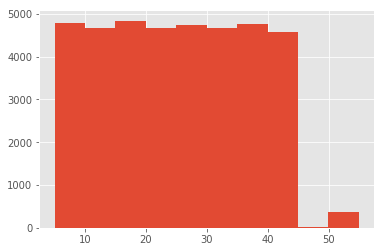

In [54]:
Drone["Package Weight"].hist()

### Analysing the relationship

We are making the graph of package with respect to the Delivery Fare and distance travelled and we get the relation that they are directly proprtional .

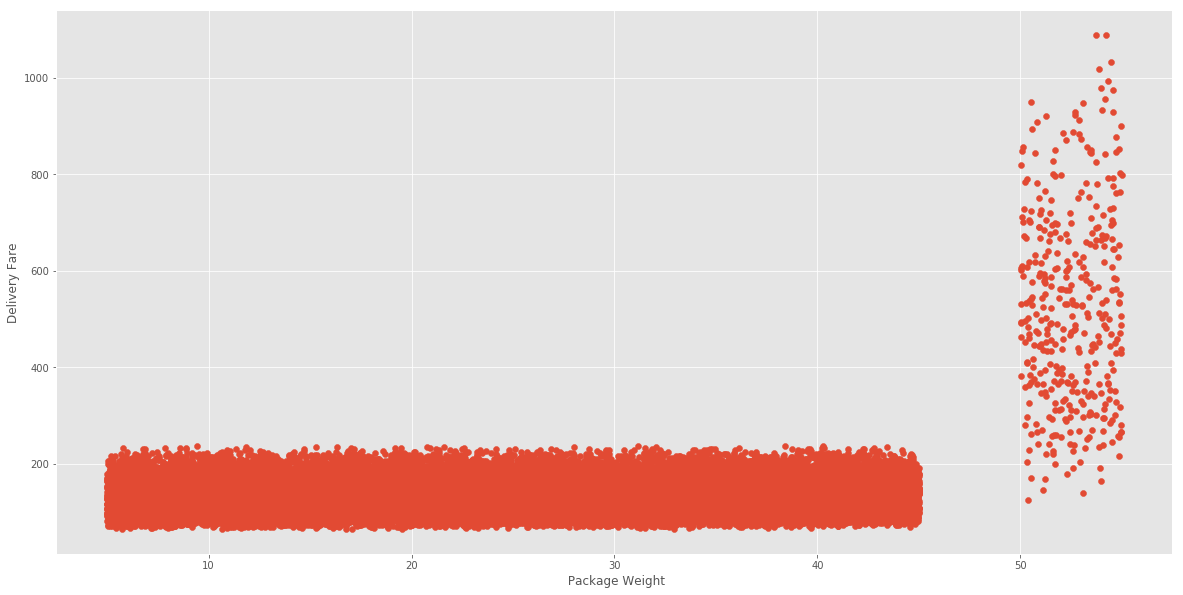

In [55]:
plt.figure(figsize=(20,10))
plt.scatter(Drone['Package Weight'], Drone['Delivery Fare'])
plt.xlabel(" Package Weight")
plt.ylabel("Delivery Fare")
plt.grid(True)

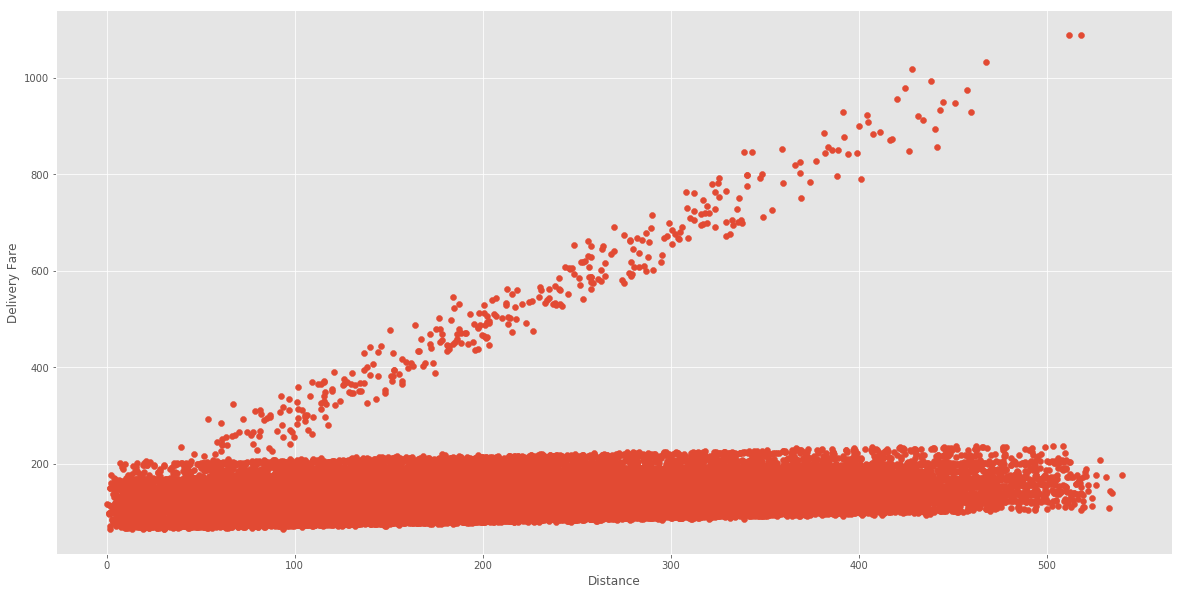

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(Drone['Journey Distance'], Drone['Delivery Fare'])
plt.xlabel("Distance")
plt.ylabel("Delivery Fare")
plt.grid(True)

In [57]:
Drone.corr()

Drone Type  Post Type  Package Weight  Origin Region  \
Drone Type               1.000000   0.005071        0.002801       0.011486   
Post Type                0.005071   1.000000       -0.005087       0.001816   
Package Weight           0.002801  -0.005087        1.000000      -0.008169   
Origin Region            0.011486   0.001816       -0.008169       1.000000   
Destination Region       0.005828  -0.002527       -0.001137      -0.005519   
Origin Latitude          0.003515   0.002063        0.000487      -0.056526   
Origin Longitude        -0.004182  -0.002149       -0.001358       0.044636   
Destination Latitude     0.002624  -0.009229        0.001321      -0.001591   
Destination Longitude   -0.002486   0.000144        0.002054       0.004038   
Journey Distance         0.000862  -0.003838        0.002018       0.028043   
Travel Time             -0.128917  -0.004755        0.001505       0.026385   
Delivery Fare            0.462321   0.269817        0.179929       0.006225   
Predicted                0.005828  -0.002527       -0.001137      -0.005519   
del_day_time             0.005124  -0.003750        0.000073      -0.007644   

                       Destination Region  Origin Latitude  Origin Longitude  \
Drone Type                       0.005828         0.003515         -0.004182   
Post Type                       -0.002527         0.002063         -0.002149   
Package Weight                  -0.001137         0.000487         -0.001358   
Origin Region                   -0.005519        -0.056526          0.044636   
Destination Region               1.000000         0.005889          0.004481   
Origin Latitude                  0.005889         1.000000         -0.071466   
Origin Longitude                 0.004481        -0.071466          1.000000   
Destination Latitude            -0.051637        -0.001650         -0.002089   
Destination Longitude            0.042476        -0.000715          0.005306   
Journey Distance                 0.023465         0.007183         -0.016501   
Travel Time                      0.022303         0.007163         -0.015952   
Delivery Fare                    0.008666         0.003419         -0.007711   
Predicted                        1.000000         0.005889          0.004481   
del_day_time                    -0.001429        -0.005585         -0.005432   

                       Destination Latitude  Destination Longitude  \
Drone Type                         0.002624              -0.002486   
Post Type                         -0.009229               0.000144   
Package Weight                     0.001321               0.002054   
Origin Region                     -0.001591               0.004038   
Destination Region                -0.051637               0.042476   
Origin Latitude                   -0.001650              -0.000715   
Origin Longitude                  -0.002089               0.005306   
Destination Latitude               1.000000              -0.077902   
Destination Longitude             -0.077902               1.000000   
Journey Distance                   0.011605              -0.032635   
Travel Time                        0.011257              -0.031720   
Delivery Fare                     -0.004033              -0.011269   
Predicted                         -0.051637               0.042476   
del_day_time                       0.001505              -0.011307   

                       Journey Distance  Travel Time  Delivery Fare  \
Drone Type                     0.000862    -0.128917       0.462321   
Post Type                     -0.003838    -0.004755       0.269817   
Package Weight                 0.002018     0.001505       0.179929   
Origin Region                  0.028043     0.026385       0.006225   
Destination Region             0.023465     0.022303       0.008666   
Origin Latitude                0.007183     0.007163       0.003419   
Origin Longitude              -0.016501    -0.015952      -0.007711   
Destination Latit

### Using Multiple regression model to predict the fare

We are taking 5 variable which are pretty sure that our value has been most corrected and checking the correlation among them 

* Drone Type
* Post Type
* Package Weight
* Journey Distance
* del_day_time
* Delivery Fare 

Refrence from tutorial

C:\Users\kanav\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


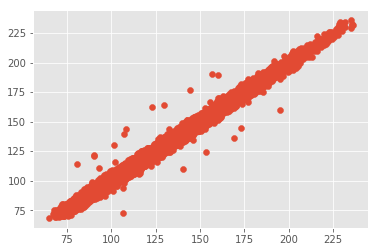

In [58]:
#importing the package.
from sklearn.cross_validation import train_test_split
#the variable used for training set.
test_model = Drone[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "del_day_time", "Delivery Fare"]][Drone["Package Weight"] < 45]
test_model1 = test_model.copy()
test_model1.dropna(subset=['Delivery Fare'], axis=0, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(test_model1.iloc[:,:-1], test_model1.iloc[:,-1:], random_state=111)
#creating object for  regression
lm_for_impute = LinearRegression()
lm_for_impute.fit(X_train, y_train)
#plotting the graph of the training test value
from sklearn.metrics import mean_squared_error 
lm_for_impute.score(X_test, y_test)
y_pred = lm_for_impute.predict(X_test)
mean_squared_error(y_test, y_pred)
plt.scatter(y_test,y_pred)


### Impute score

In [59]:
lm_for_impute.score(X_test, y_test)

0.9901450786049679

In [60]:
#imputing the value into a new fare using the linear regression model.
Drone[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "del_day_time"]]
Drone["fare_new"] = lm_for_impute.predict(Drone[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "del_day_time"]])

### Removing outliers package weight greater than 45

Storing the outliers in a new variable then dropping the values corresponding to that index. 
Only 30 values are removed.

In [61]:
Drone["res_err"] = (Drone["fare_new"]- Drone["Delivery Fare"])**2
temp1 = Drone[Drone["Package Weight"]<45]["res_err"].sort_values(ascending=False).head(30)

In [62]:
temp1['a']=temp1

In [63]:
out_index = temp1.index.tolist()

In [64]:
out_index = out_index[:-1]

In [65]:
Drone = Drone.drop(Drone.index[out_index])

#### Imputing the null value in the main column by the values which we have got from the new_fare using regression model.

In [66]:
null =Drone[Drone['Delivery Fare'].isnull()].index.tolist()

In [67]:
count=0
for i in null:
    Drone["Delivery Fare"][i]=Drone["fare_new"][i]
    count+=1
count    
    

C:\Users\kanav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


30

In [68]:
Drone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38052 entries, 0 to 38081
Data columns (total 21 columns):
Id                       38052 non-null object
Drone Type               38052 non-null float64
Post Type                38052 non-null int32
Package Weight           38052 non-null float64
Origin Region            38052 non-null float64
Destination Region       38052 non-null float64
Origin Latitude          38052 non-null float64
Origin Longitude         38052 non-null float64
Destination Latitude     38052 non-null float64
Destination Longitude    38052 non-null float64
Journey Distance         38052 non-null float64
Departure Date           38052 non-null object
Departure Time           38052 non-null object
Travel Time              38052 non-null float64
Delivery Time            38052 non-null object
Delivery Fare            38052 non-null float64
ID                       38052 non-null object
Predicted                38052 non-null float64
del_day_time             38052 non

## Changing the data type into float.

In [69]:
Drone["Post Type"]=Drone["Post Type"].astype(float)

### Dropping the extra columns

In [70]:
Drone.drop(['ID', 'Predicted','del_day_time','fare_new','res_err'], axis=1, inplace=True)

In [71]:
Drone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38052 entries, 0 to 38081
Data columns (total 16 columns):
Id                       38052 non-null object
Drone Type               38052 non-null float64
Post Type                38052 non-null float64
Package Weight           38052 non-null float64
Origin Region            38052 non-null float64
Destination Region       38052 non-null float64
Origin Latitude          38052 non-null float64
Origin Longitude         38052 non-null float64
Destination Latitude     38052 non-null float64
Destination Longitude    38052 non-null float64
Journey Distance         38052 non-null float64
Departure Date           38052 non-null object
Departure Time           38052 non-null object
Travel Time              38052 non-null float64
Delivery Time            38052 non-null object
Delivery Fare            38052 non-null float64
dtypes: float64(12), object(4)
memory usage: 6.2+ MB


In [72]:
Drone.to_csv('29554209_solution.csv',index=False)